In [1]:

%matplotlib widget
# %matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
import h5py

import os
print(os.getpid())
%cd ../../

import pylib.mix as mix
import pylib.measurement as mse
import kvn

colors_ = ["blue", "red", "green", "gray", "black"]

16927
/media/work/docs/codes/QuCF/scripts-py


In [2]:
for i in range(10):
    plt.close()

In [3]:
# ------------------------------------------------------------------------------
def get_lchs(kmax, Nk):
    Nk = int(Nk)
    k = np.linspace(-kmax, kmax, Nk)
    
    dk = np.diff(k)[0]
    coef_dk = dk / np.pi
    w = coef_dk / (1 + k**2)

    str_label = "kmax = {:0.0e}, Nk = {:0.0e}, dk = {:0.1e}".format(kmax, Nk, dk)

    y_qc = np.zeros(Nt, dtype=complex)
    for ii in range(Nt):
        y_qc[ii] = np.sum( w * np.exp(- 1.j * k * A * t[ii]) )
    return y_qc.real / y_qc[0].real, str_label

# ------------------------------------------------------------------------------
def plotting_signals(qc_data):

    # --- signals ---
    fig = plt.figure()
    ax = fig.add_subplot(111)   
    ax.plot(t, np.log10(y_ref), "-b", linewidth = 3, label="ref")
    counter_curve = 0
    for dd in qc_data:
        counter_curve += 1
        ax.plot(
            t, np.log10(np.abs(dd[0])), 
            "--", color = colors_[counter_curve], linewidth = 2, 
            label="LCHS: {:s}".format(dd[1])
    )
    plt.xlabel('$t$')
    plt.ylabel("log10|psi(t)|")
    ax.legend()
    plt.grid(True)
    plt.show()

    # --- errors ---
    log_err = np.zeros((len(qc_data), Nt))  

    fig = plt.figure()
    ax = fig.add_subplot(111) 
    counter_curve = -1
    for dd in qc_data:
        counter_curve += 1
        for it in range(Nt):
            temp = np.abs(y_ref[it] - dd[0][it])
            if temp <= 1e-12:
                temp = 1e-12
            log_err[counter_curve, it] = np.log10(temp)

        ax.plot(
            t, log_err[counter_curve,:], 
            "--", color = colors_[counter_curve+1], linewidth = 2, 
            label="LCHS: {:s}".format(dd[1])
    )
    plt.xlabel('$t$')
    plt.ylabel("log10|ref - LCHS|")
    ax.legend()
    plt.grid(True)
    plt.show()
    return log_err

In [21]:
# -------------------------------------------------------
# --- Error in the LCHS simulation ---
# -------------------------------------------------------
A = 1.0

# --- time grid ---
Nt = 2001
t_max = 40.
t = np.linspace(0, t_max, Nt)

# --- reference signal ---
y_ref = np.exp(- A * t)

# --- kmax = 100, scan on Nk (on dk) ---
print("--- Fixed kmax, scan on Nk (on dk) ---")
kmax_1 = 100
Nk_grid_1 = [0.25e3, 0.50e3, 1.00e3, 2.00e3]
qc_data_fixed_kmax = []
for Nk in Nk_grid_1:
    qc_data_fixed_kmax.append(get_lchs(kmax_1, Nk))


# --- fixed dk = 100, scan kmax ---
print("--- Fixed dk, scan on kmax ---")
kmax_grid_2 = np.array([1e1, 1e2, 1e3])
Nk_grid_2   = kmax_grid_2 * 100
qc_data_fixed_dk = []
for ii in range(len(kmax_grid_2)):
    qc_data_fixed_dk.append(get_lchs(kmax_grid_2[ii], Nk_grid_2[ii]))


--- Fixed kmax, scan on Nk (on dk) ---
--- Fixed dk, scan on kmax ---



--- Fixed kmax, scan on Nk (on dk) ---


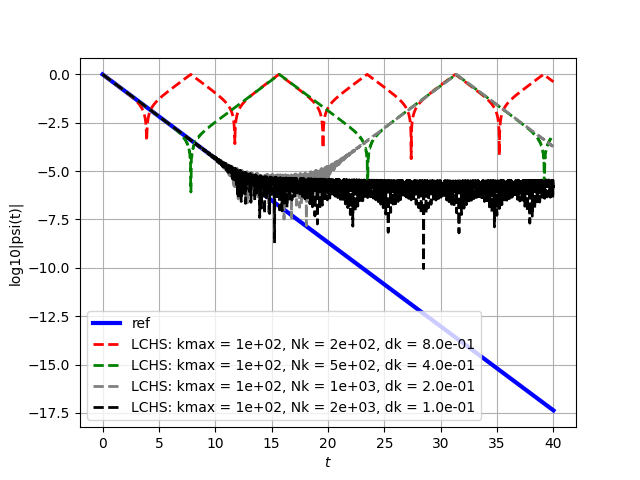

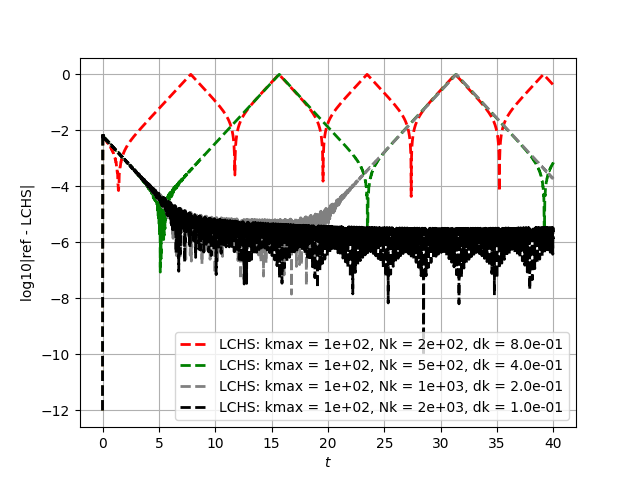


--- Fixed dk, scan on kmax ---


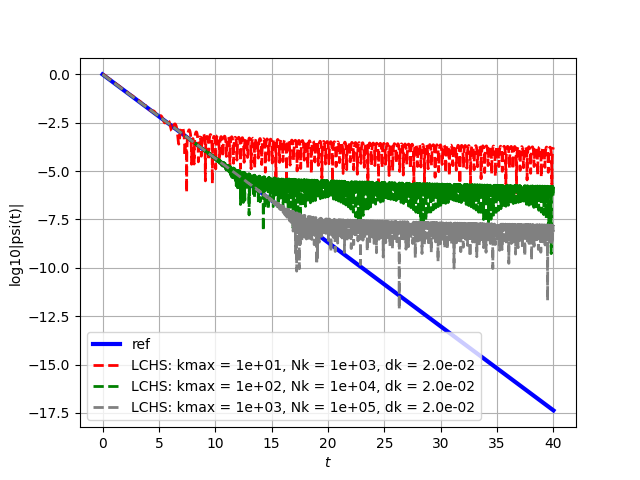

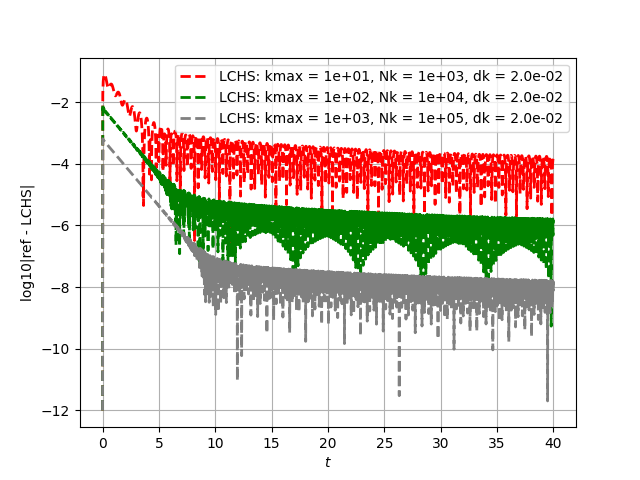

In [22]:
# ------------------------------------------------
# --- Plot results ---
# ------------------------------------------------
print()
print("--- Fixed kmax, scan on Nk (on dk) ---")
err_fixed_kmax = plotting_signals(qc_data_fixed_kmax)

print()
print("--- Fixed dk, scan on kmax ---")
err_fixed_dk = plotting_signals(qc_data_fixed_dk)

In [23]:
# ----------------------------------------------------
# --- Save results ---
# ----------------------------------------------------
def save_data(kmax, Nk, data, str_y):
    fname = "LCHS_scalar_{:s}_kmax{:d}_Nk{:d}.dat".format(
        str_y, int(kmax), int(Nk)
    )
    mix.save_dat_plot_1d_file(path_save_ + "/" + fname, t, data)
    return
# ------------------------------------------------------

path_save_ = "./jupyter-notebooks/NL/results/"

fname = "LCHS_scalar_ref.dat"
mix.save_dat_plot_1d_file(path_save_ + "/" + fname, t, np.log10(np.abs(y_ref)))

for ii in range(len(Nk_grid_1)):
    Nk = Nk_grid_1[ii]
    save_data(kmax_1, Nk, np.log10(np.abs(qc_data_fixed_kmax[ii][0])), "signal")
    save_data(kmax_1, Nk, err_fixed_kmax[ii,:], "error")

for ii in range(len(Nk_grid_2)):
    Nk   = Nk_grid_2[ii]
    kmax = kmax_grid_2[ii]
    save_data(kmax, Nk, np.log10(np.abs(qc_data_fixed_dk[ii][0])), "signal")
    save_data(kmax, Nk, err_fixed_dk[ii,:], "error")

write data to a file: ./jupyter-notebooks/NL/results//LCHS_scalar_ref.dat
write data to a file: ./jupyter-notebooks/NL/results//LCHS_scalar_signal_kmax100_Nk250.dat
write data to a file: ./jupyter-notebooks/NL/results//LCHS_scalar_error_kmax100_Nk250.dat
write data to a file: ./jupyter-notebooks/NL/results//LCHS_scalar_signal_kmax100_Nk500.dat
write data to a file: ./jupyter-notebooks/NL/results//LCHS_scalar_error_kmax100_Nk500.dat
write data to a file: ./jupyter-notebooks/NL/results//LCHS_scalar_signal_kmax100_Nk1000.dat
write data to a file: ./jupyter-notebooks/NL/results//LCHS_scalar_error_kmax100_Nk1000.dat
write data to a file: ./jupyter-notebooks/NL/results//LCHS_scalar_signal_kmax100_Nk2000.dat
write data to a file: ./jupyter-notebooks/NL/results//LCHS_scalar_error_kmax100_Nk2000.dat
write data to a file: ./jupyter-notebooks/NL/results//LCHS_scalar_signal_kmax10_Nk1000.dat
write data to a file: ./jupyter-notebooks/NL/results//LCHS_scalar_error_kmax10_Nk1000.dat
write data to a f

In [11]:
qc_data_fixed_dk[1][0]

array([ 1.000e+00,  9.887e-01,  9.663e-01, ...,  4.760e-07,  1.234e-06,
       -1.503e-06])

In [14]:
err_fixed_dk[0,:]

array([-12.   ,  -1.73 ,  -1.461, ...,  -3.834,  -3.791,  -3.769])